<h3> Mock Interview Python Screening test </h3>


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
dataframe = pd.read_csv("adult_census_data.csv")

In [3]:
#Check spelling and spacing of column names
print(dataframe.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


<b> Q1. After importing the adult_census_data.csv file, please filter this to include only the following criteria: </b>
<p>

<li> State-Gov</li>
<li> Bachelors </li>
<li> Never-Married </li>
<li> Adm-Clerical </li> 
<li> Not-in-familiy </li>
<li> White </li>
<li> Male </li> 
<li> United States </li>
<li> <=50K </li> 

<b> Feel free to any method to complete this tasks. However, we recommend you use either list filtering [], or .loc to complete this task.</b>

<b> Put your code below </b>

In [7]:
#Rename dataframe as 'census' and subset for desired columns
census = dataframe[[' State-gov',' Bachelors',' Never-married',' Adm-clerical',' Not-in-family',' White',' Male',' United-States',' <=50K']]

#Check that only desired columns remain
census.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


<b> Currently, the dataframe you are using has the following column names: </b>

[' State-gov', ' Bachelors', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']
       
     
<b> Q2. Please re-name all the newly filtered columns in the pandas DataFrame to the following: </b>

Employment Type, Degree Status, Marriage-Status, Job-Role, Family-Role, Ethnicity, Gender, Country, Earnings

E.g. State-Gov becomes Employment Type, Bachelors becomes Degree Status, etc.

<b> Put your code below </b>

In [8]:
#Use a dictionary to equate new name to old name with .rename 
#Use 'inplace = True' to avoid creating a new DataFrame
census.rename(columns={' State-gov':'Employment Type',' Bachelors':'Degree Status',' Never-married':'Marriage Status',' Adm-clerical':'Job Role',' Not-in-family':'Family Role',' White':'Ethnicity',' Male':'Gender',' United-States':'Country',' <=50K':'Earnings'},inplace=True)

#Check again
census.head()

/var/folders/hj/93bjfvs11b5_vl0_11bknq340000gn/T/ipykernel_15489/587816325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census.rename(columns={' State-gov':'Employment Type',' Bachelors':'Degree Status',' Never-married':'Marriage Status',' Adm-clerical':'Job Role',' Not-in-family':'Family Role',' White':'Ethnicity',' Male':'Gender',' United-States':'Country',' <=50K':'Earnings'},inplace=True)


,Employment Type,Degree Status,Marriage Status,Job Role,Family Role,Ethnicity,Gender,Country,Earnings
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


<b> Q3. The Job Role Columns holds the job information for each individual in this census snapshot. Using this column, create a Bar Chart that shows the count of 'Unique' Jobs per Job Group in the "Job-Role" Column in ascending order, as per the provided image below </b>


<b> Put your code below </b>

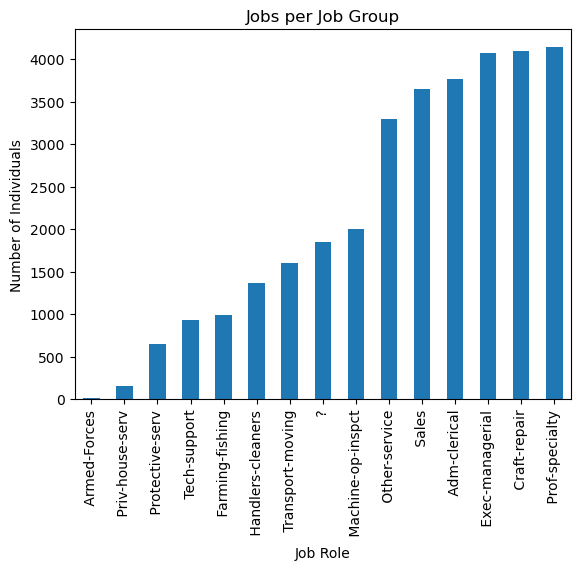

In [49]:
#Count unique values in the Job Role column with .value_counts
unique_jobs = census['Job Role'].value_counts(ascending = True)

#Plot the data
unique_jobs.plot(kind='bar')
plt.xlabel('Job Role')
plt.ylabel('Number of Individuals')
plt.title('Jobs per Job Group')
plt.show()

<b> Q4. Please create two bar plots as per below that show:
    
    1) The number of individuals who have a High School Graduate Diploma AND earn <=50K in the United States
    2) The number of individuals who have a High School Graduate Diploma AND earn >50K in the United States 

Please note you will be looking specifically at the *Job Role* column

<b> Put Your Code Below </b>

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


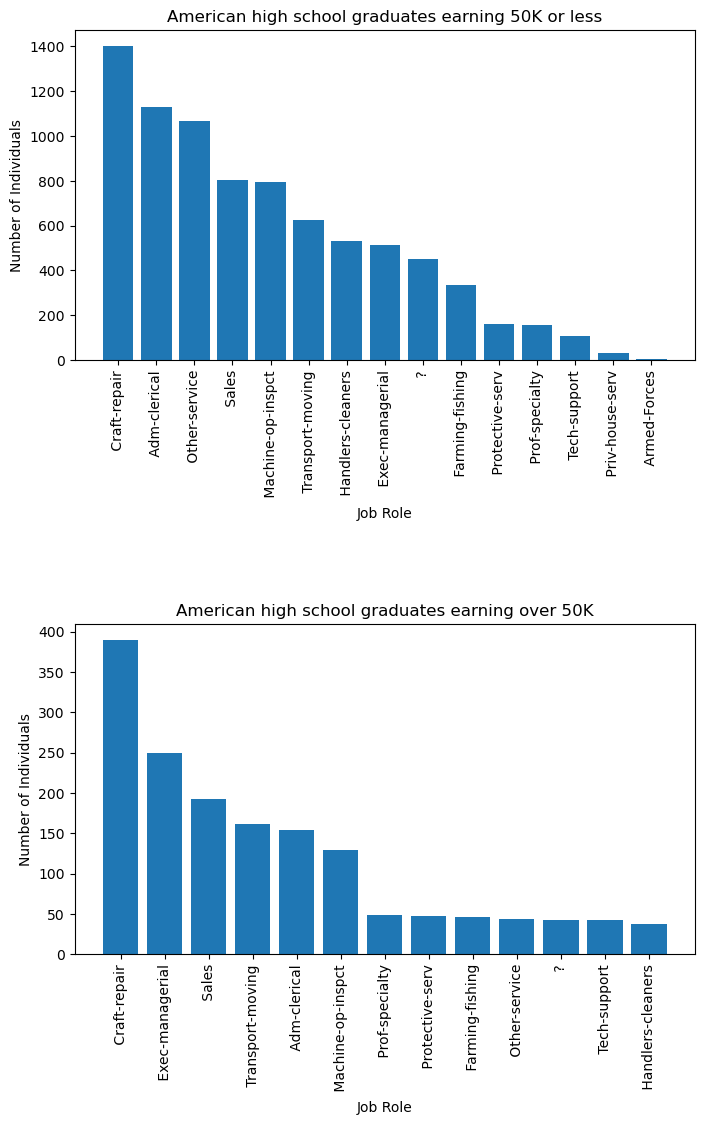

In [50]:
#Check values for spelling and spacing
unique_degree_status_values = census['Degree Status'].unique()
print(unique_degree_status_values)

#Create filtered DataFrames for each economic group
under_fifty = census[(census['Degree Status']==' HS-grad') & (census['Earnings']==' <=50K') & (census['Country']==' United-States')]
over_fifty = census[(census['Degree Status']==' HS-grad') & (census['Earnings']==' >50K') & (census['Country']==' United-States')]

#Count individuals in the Job Role column with .value_counts 
under_fifty_counts = under_fifty['Job Role'].value_counts()
over_fifty_counts = over_fifty['Job Role'].value_counts()

#Plot with subplots - two rows, one column
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(8,12))

#Extend space between subplots to prevent overlap
plt.subplots_adjust(hspace=0.8)

#Plot bar charts with job roles as x-values and counts as y-values
ax1.bar(x=under_fifty_counts.index, height=under_fifty_counts.values)
ax1.set_xlabel('Job Role')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('American high school graduates earning 50K or less')
ax1.tick_params(axis='x',rotation=90)

ax2.bar(x=over_fifty_counts.index, height=over_fifty_counts.values)
ax2.set_xlabel('Job Role')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('American high school graduates earning over 50K')
ax2.tick_params(axis='x',rotation=90)


plt.show()

<H2> Challenge Question </H2>

<b> Q5. Which Job Role has the highest <i> proportion </i> of individuals who earn >50K? </b>

<b> Put your code below </b>

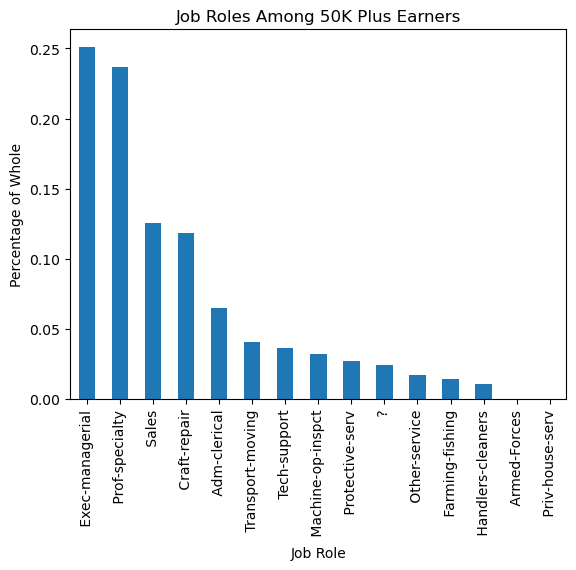

In [44]:
#Subset 'census' to keep only 50K+ earners
fifty_plus = census[census['Earnings']==' >50K']

#Count unique values in the Job Role column with .value_counts
#Pass the argument 'normalize = True' to return the counts as percentages of a whole 
fifty_plus_by_job_role = fifty_plus['Job Role'].value_counts(normalize=True, ascending=False)

#Plot the normalized counts
fifty_plus_by_job_role.plot(kind='bar')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Whole')
plt.title('Job Roles Among 50K Plus Earners')
plt.show()
